#### Doc preliminar

# Análisis del tamaño de deforestación
## Periodo de 2010 - 2019, 2018 - 2019 y Región de la amazonia

Cristhian Forero, Omar Sotelo - Sistema de Monitoreo de Bosques y Carbono SMBYC



Este documento analiza el tamaño de las areas deforestadas registradas a nivel nacional durante el los periodos 2010-2019, de los resultados del componente de Cuantificación de la Superficie de Bosque Natural y Superficie Deforestada a nivel nacional y regional, basado en el procesamiento digital semiautomatizado de imágenes de sensores remotos de la clase Deforestación. 


## Contenido 


> #### 1. Análisis Nacional de los tamaños de deforestación de la serie de tiempo 2010-2019
> #### 2. Análisis Nacional de los tamaños de deforestación del cambio 2018 - 2019
> #### 3. Análisis de la región de la Amazonia para el año 2018 - 2019
> #### 4. Comparación de la variación de los tamaños de deforestación en la región de la Amazonia 
> #### 5. Conclusiones



In [24]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
    $('div.input').hide();
    } else {
    $('div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## 1. Análisis Nacional de los tamaños de deforestación de la serie de tiempo 2010-2019

Los datos fueron generados a partir de los mapas oficiales de cambio de bosque disponibles en el Sistema de Monitoreo de Bosques y Carbono – SMBYC (http://smbyc.ideam.gov.co/). Se extrae la clase temática de deforestación y se genera un archivo .shp teniendo en cuenta un conexión de 8 vecinos. El archivo contiene las áreas (hectáreas) de cada polígono detectado como deforestación para cada periodo. Las columnas presentes en el archivo de la serie temporal son las siguientes:

+ Deforestación 2010 - 2012   =>   def_10_12
+ Deforestación 2012 - 2013   =>   def_13
+ Deforestación 2013 - 2014   =>   def_14
+ Deforestación 2014 - 2015   =>   def_15
+ Deforestación 2015 - 2016   =>   def_16
+ Deforestación 2016 - 2017   =>   def_17
+ Deforestación 2017 - 2018   =>   def_18
+ Deforestación 2018 - 2019   =>   def_19

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm

data = 'E:/Trabajo/1_SMBYC/1_Deforestación/Tamaño_Deforestación/V2/Deforestación_total_def_14_19_anual_ident_py.csv'
df = pd.read_csv(data, sep=";")
df.head(3)

,wkt_geom,FID_nucleo,año,def,depto,nucleo,mpio,vereda
0,PointZ (1112845.70334756723605096 233340.18009...,971,4,0.836614,AMAZONAS,NaN,EL ENCANTO (AMAZONAS),PUERTO BELÉN (EL ENCANTO-AMAZONAS)
1,PointZ (1112784.26937104389071465 233627.67327...,973,5,0.929571,AMAZONAS,NaN,EL ENCANTO (AMAZONAS),PUERTO BELÉN (EL ENCANTO-AMAZONAS)
2,PointZ (1127856.64044440328143537 233656.81488...,975,6,5.019684,AMAZONAS,NaN,EL ENCANTO (AMAZONAS),PUERTO BELÉN (EL ENCANTO-AMAZONAS)


### 1.1. Estructura  y descripción de la información proporcionada 

In [48]:
print('Cantidad de Filas y columnas:',df.shape)
#print('Nombre columnas:',df.columns)
df.info()

Cantidad de Filas y columnas: (267587, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267587 entries, 0 to 267586
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   wkt_geom    267587 non-null  object 
 1   FID_nucleo  267587 non-null  int64  
 2   año         267587 non-null  int64  
 3   def         267587 non-null  float64
 4   depto       267587 non-null  object 
 5   nucleo      135779 non-null  object 
 6   mpio        267587 non-null  object 
 7   vereda      267587 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 16.3+ MB


A continuación se realiza un análisis descriptivo de las estadísticas generales de los tamaños de la deforestacón de cada año de análisis.

In [49]:
df2=df.drop(['wkt_geom'], axis=1)
def14=df[df['año'] == 4]
def15=df[df['año'] == 5]
def16=df[df['año'] == 6]
def17=df[df['año'] == 7]
def18=df[df['año'] == 8]
def19=df[df['año'] == 9]


df2 = pd.DataFrame({'def14':def14['def'],'def15':def15['def'], 'def16':def16['def'], 'def17':def17['def'], 'def18':def18['def'], 'def19': def19['def']})
print(df2)

           def14     def15     def16  def17  def18  def19
0       0.836614       NaN       NaN    NaN    NaN    NaN
1            NaN  0.929571       NaN    NaN    NaN    NaN
2            NaN       NaN  5.019684    NaN    NaN    NaN
3            NaN       NaN  2.509842    NaN    NaN    NaN
4            NaN  1.859142       NaN    NaN    NaN    NaN
...          ...       ...       ...    ...    ...    ...
267582  3.532370       NaN       NaN    NaN    NaN    NaN
267583  1.208442       NaN       NaN    NaN    NaN    NaN
267584  0.464786       NaN       NaN    NaN    NaN    NaN
267585       NaN  1.208442       NaN    NaN    NaN    NaN
267586       NaN  1.115485       NaN    NaN    NaN    NaN

[267587 rows x 6 columns]


In [50]:
print (def14['def'].sum())
print (def15['def'].sum())
print (def16['def'].sum())
print (def17['def'].sum())
print (def18['def'].sum())
print (def19['def'].sum())
df2.sum()

140353.792363934
124025.97011420202
178548.657695915
219392.707517389
197130.410831486
158845.09823763598


def14    140353.792364
def15    124025.970114
def16    178548.657696
def17    219392.707517
def18    197130.410832
def19    158845.098238
dtype: float64

En la anterior tabla se puede observar las estadísticas generales de los datos de deforestación para cada periodo, cabe resaltar que el **promedio** de los tamaños de deforestación presentan una **tendencia de aumento** a lo largo de los años.

### 1.2. Diagramas de distribución de la deforestación de acuerdo al tamaño

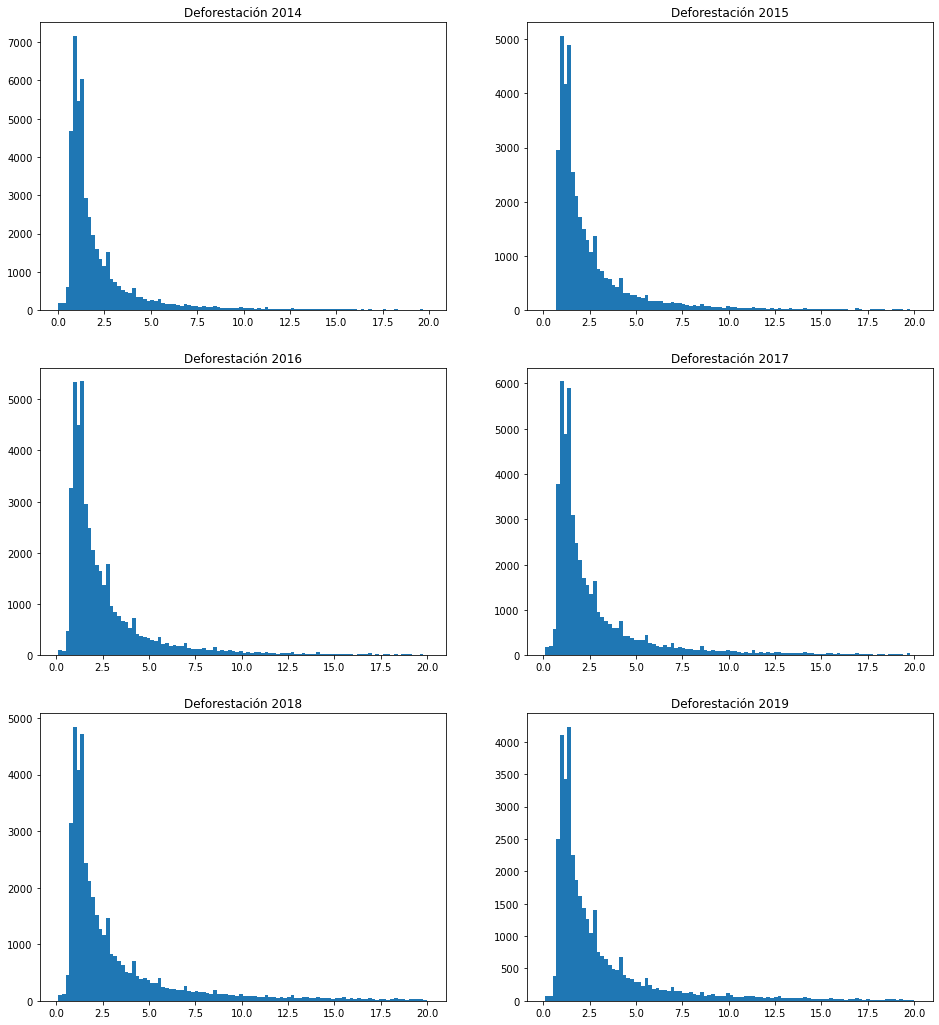

In [51]:
fig, ax= plt.subplots(3,2,figsize=(16,18))
bins=100
ax[0][0].hist(def14['def'],bins=bins,range=(0.1,20),align='left')
ax[0][1].hist(def15['def'],bins=bins,range=(0.1,20))
ax[1][0].hist(def16['def'],bins=bins,range=(0.1,20))
ax[1][1].hist(def17['def'],bins=bins,range=(0.1,20))
ax[2][0].hist(def18['def'],bins=bins,range=(0.1,20))
ax[2][1].hist(def19['def'],bins=bins,range=(0.1,20))
_=ax[0][0].set_title('Deforestación 2014')
_=ax[0][1].set_title('Deforestación 2015')
_=ax[1][0].set_title('Deforestación 2016')
_=ax[1][1].set_title('Deforestación 2017')
_=ax[2][0].set_title('Deforestación 2018')
_=ax[2][1].set_title('Deforestación 2019')



En las anteriores gráficas se observa la distribución de las áreas de deforestación, se puede observar una concentración en las áreas de menos de 5 hectáreas. *Nota: el periodo 2010 – 2012 presenta mayor número de polígonos de deforestación ya que se cuantifico la deforestación de dos años consecutivos*  

&nbsp;
A continuación se muestra un box plot de los datos de análisis, nos permite intuir su morfología y simetría, ademas este tipo de gráfica nos permite identificar valores atípicos y comparar distribuciones. Respecto a los valores atípicos se resalta lo valores máximos del conjunto de datos, el año 2016 presenta varios polígonos de mas de 2.000 hectáreas deforestadas, para ultimo periodo se evidencia un polígono de más de 2.300 hectáreas. Así mismo se puede evidenciar la agrupación de la mayoría de datos esta entre 1 y 10 hectáreas.


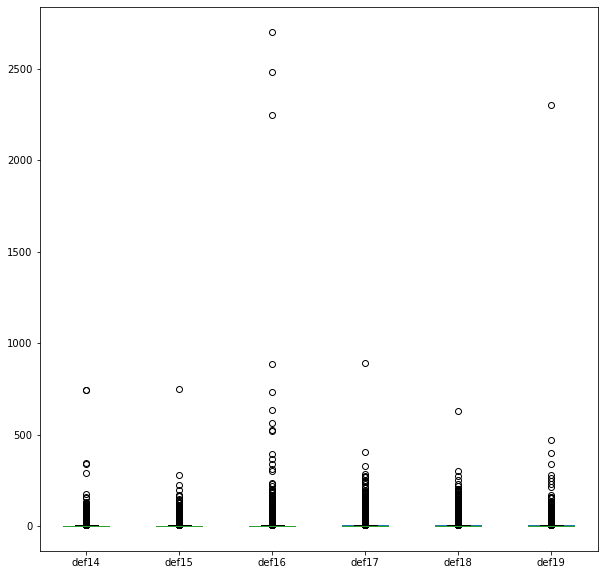

In [52]:
df2.plot.box(figsize=(10,10));

### 1.3. Sumatoria de la deforestación de cada periodo 

AxesSubplot(0.125,0.125;0.775x0.755)


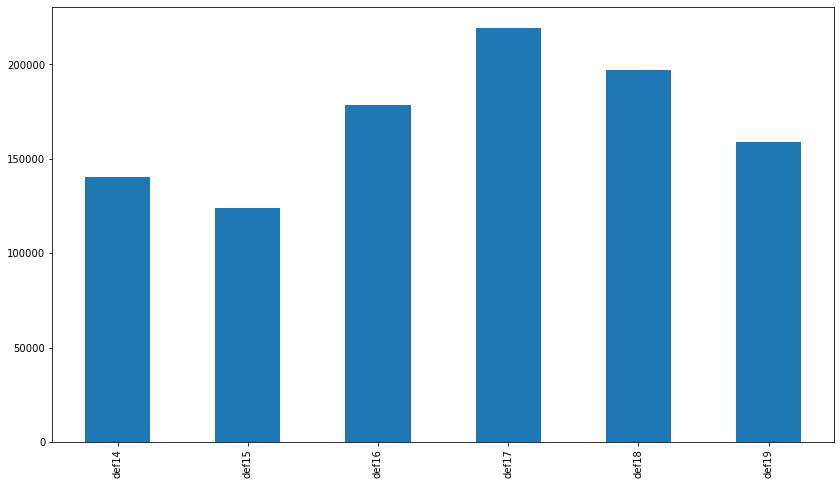

In [53]:
print (df2.sum().plot.bar(figsize=(14, 8), sharey=True))

### 1.4. Valor promedio de la deforestación de cada periodo 

En siguiente gráfica se puede observar el comportamiento promedio del tamaño de la deforestación a nivel nacional, que de acuerdo a los datos a partir del año 2015 presenta una tendencia creciente del tamaño de la deforestación. Cabe resaltar que el para el año 2019 el promedio del tamaño de la deforestación disminuyo en un 6.74% (de 4.45 ha a 4.15 ha) respecto al año inmediatamente anterior.
>+ 2010 – 2012 : 2.92 ha
+ 2012 – 2013 : 2.74 ha
+ 2013 – 2014 : 3.92 ha
+ 2014 – 2015 : 3.19 ha
+ 2015 – 2016 : 3.82 ha
+ 2016 – 2017 : 4.30 ha
+ 2017 – 2018 : 4.45 ha
+ 2018 – 2019 : **4.15 ha**



AxesSubplot(0.125,0.125;0.775x0.755)


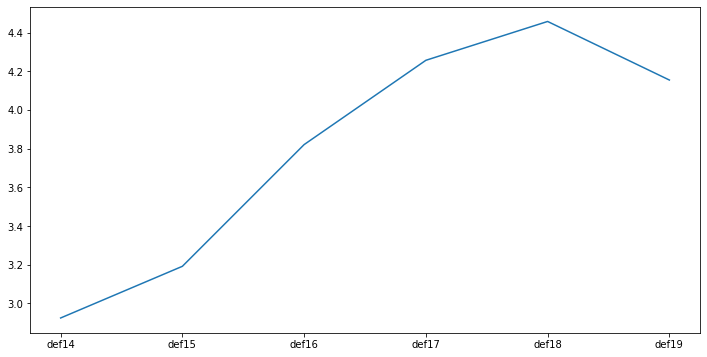

In [54]:
print (df2.mean().plot(figsize=(12, 6), sharey=True))

### 1.5. Valores máximos deforestados 

Respecto a los valores máximos se presenta variaciones significativas por zonas afectadas por incendios, para el caso del año 2019 el polígono más grande detectado fue de 2.303 hectáreas aproximadamente 

AxesSubplot(0.125,0.125;0.775x0.755)


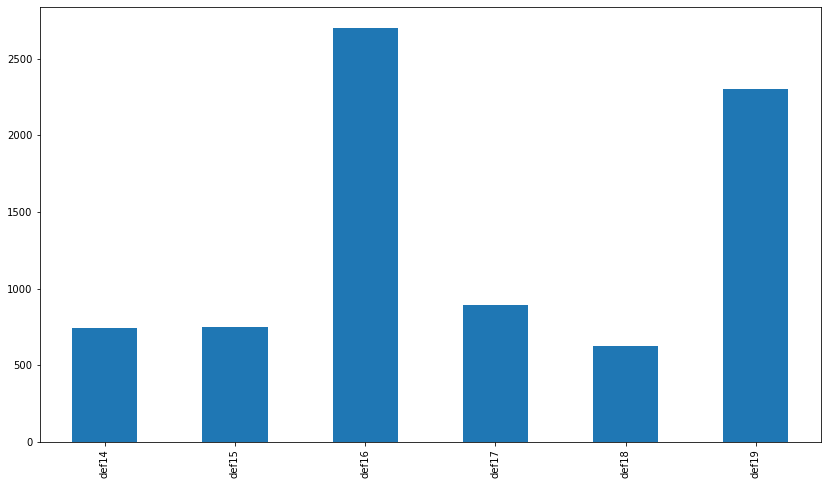

In [55]:
print (df2.max().plot.bar(figsize=(14, 8), sharey=True))

### 1.6. Frecuencia de los tamaños deforestados 

La frecuencia es el número de veces que aparecen las áreas deforestadas agrupadas en un rango determinado. Cantidad de polígonos que se encuentran en los rangos establecidos del í-esimo valor de la variable. En las siguientes gráficas se visualiza las frecuencias de cada periodo de estudio. 
&nbsp; 
Los rangos establecidos son lo siguientes: 
>+ (0 a 2)
+ [2 a 5)
+ [5 a 10)
+ [10 a 20)
+ [20 a 30)
+ [30 a 50)
+ [ >= 50]


In [91]:
#print(df2.def14)
frecuencia_14 = pd.cut(df2['def14'], bins=bins)
print(frecuencia_14)

0         (0.0, 1.999]
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
267582    (1.999, 5.0]
267583    (0.0, 1.999]
267584    (0.0, 1.999]
267585             NaN
267586             NaN
Name: def14, Length: 267587, dtype: category
Categories (7, interval[float64]): [(0.0, 1.999] < (1.999, 5.0] < (5.0, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 50.0] < (50.0, 5000.0]]


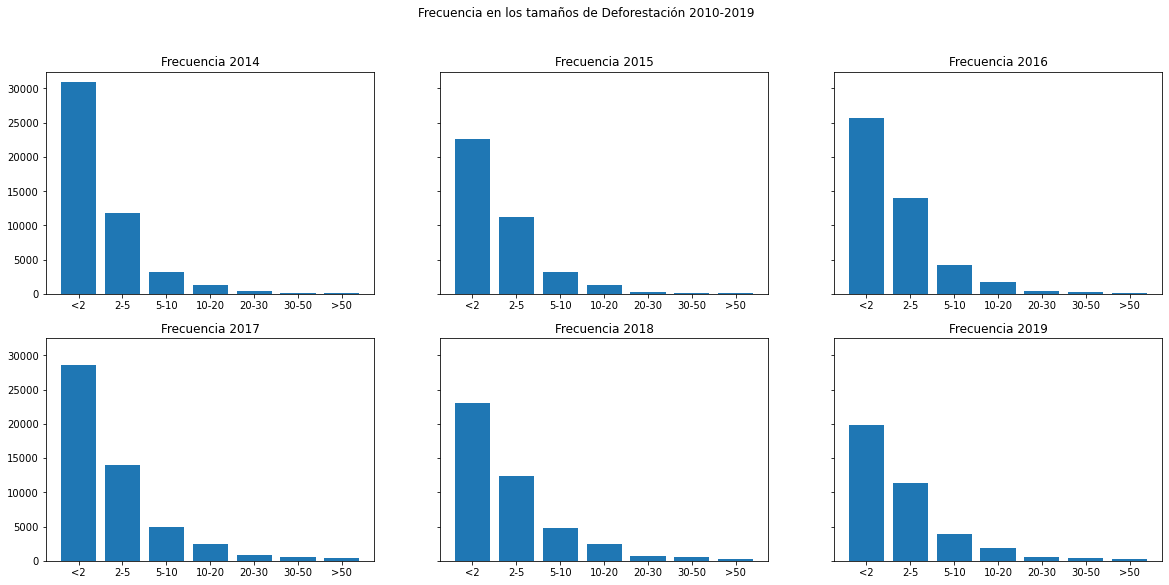

In [92]:
bins = list([0, 1.999, 5, 10, 20, 30, 50, 5000 ])
names = list(['<2', '2-5', '5-10', '10-20', '20-30', '30-50', '>50'])

#def_14
frecuencia_14 = pd.cut(df2['def14'], bins=bins)
fr_14 = (df.groupby(frecuencia_14).agg(frequency=("def", "count")).reset_index())
fr_14["cum_frequency"] = fr_14["frequency"].cumsum()
#def_15
frecuencia_15 = pd.cut(df2["def15"], bins=bins)
fr_15 = (df.groupby(frecuencia_15).agg(frequency=("def", "count")).reset_index())
fr_15["cum_frequency"] = fr_15["frequency"].cumsum()
#def_16
frecuencia_16 = pd.cut(df2["def16"], bins=bins)
fr_16 = (df.groupby(frecuencia_16).agg(frequency=("def", "count")).reset_index())
fr_16["cum_frequency"] = fr_16["frequency"].cumsum()
#def_17
frecuencia_17 = pd.cut(df2["def17"], bins=bins)
fr_17 = (df.groupby(frecuencia_17).agg(frequency=("def", "count")).reset_index())
fr_17["cum_frequency"] = fr_17["frequency"].cumsum()
#def_18
frecuencia_18 = pd.cut(df2["def18"], bins=bins)
fr_18 = (df.groupby(frecuencia_18).agg(frequency=("def", "count")).reset_index())
fr_18["cum_frequency"] = fr_18["frequency"].cumsum()
#def_19
frecuencia_19 = pd.cut(df2["def19"], bins=bins)
fr_19 = (df.groupby(frecuencia_19).agg(frequency=("def", "count")).reset_index())
fr_19["cum_frequency"] = fr_19["frequency"].cumsum()

fig, axs = plt.subplots(2, 3, figsize=(20, 9), sharey=True)
axs[0][0].bar(names, list(fr_14["frequency"]))
axs[0][0].set_title('Frecuencia 2014')
axs[0][1].bar(names, list(fr_15["frequency"]))
axs[0][1].set_title('Frecuencia 2015')
axs[0][2].bar(names, list(fr_16["frequency"]))
axs[0][2].set_title('Frecuencia 2016')


axs[1][0].bar(names, list(fr_17["frequency"]))
axs[1][0].set_title('Frecuencia 2017')
axs[1][1].bar(names, list(fr_18["frequency"]))
axs[1][1].set_title('Frecuencia 2018')
axs[1][2].bar(names, list(fr_19["frequency"]))
axs[1][2].set_title('Frecuencia 2019')

fig.suptitle('Frecuencia en los tamaños de Deforestación 2010-2019')
# adding horizontal grid lines
#for ax in axs:
    #ax.yaxis.grid(False)
    #ax.set_xlabel('Tamaño de Deforestación')
    #ax.set_ylabel('Observed values')
plt.show()

### 1.7. Distribución de la Frecuencia de los tamaños deforestados en los ultimos 4 periodos de análisis 

De acuerdo a los rangos se observa que existe una tendencia en la reducción de la cantidad de polígonos de deforestación en los últimos 2 periodos

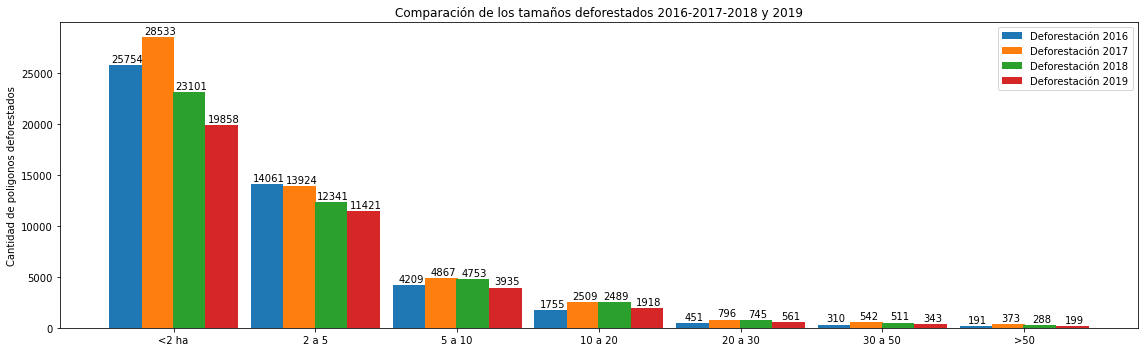

In [93]:
labels = ['<2 ha','2 a 5','5 a 10','10 a 20','20 a 30', '30 a 50','>50']
data = list(fr_16["frequency"]), list(fr_17["frequency"]), list(fr_18["frequency"]), list(fr_19["frequency"])

x = np.arange(len(labels)) 
width = 0.23  # the width of the bars

fig, ax = plt.subplots(figsize=(16,5))
rects1 = ax.bar(x - 0.34,  list(fr_16["frequency"]), width, label='Deforestación 2016')
rects2 = ax.bar(x - 0.11,  list(fr_17["frequency"]), width, label='Deforestación 2017')
rects3 = ax.bar(x + 0.11,  list(fr_18["frequency"]), width, label='Deforestación 2018')
rects4 = ax.bar(x + 0.34,  list(fr_19["frequency"]), width, label='Deforestación 2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad de poligonos deforestados')
ax.set_title('Comparación de los tamaños deforestados 2016-2017-2018 y 2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(2, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
fig.tight_layout()
plt.show()

## 2. Análisis Nacional de los tamaños de deforestación del cambio 2018 - 2019

Una vez observado el comportamiento a nivel nacional de la serie de tiempo de 2010 a 2019, a continuación se detalla mas específicamente el cambio del ultimo periodo (2019). 

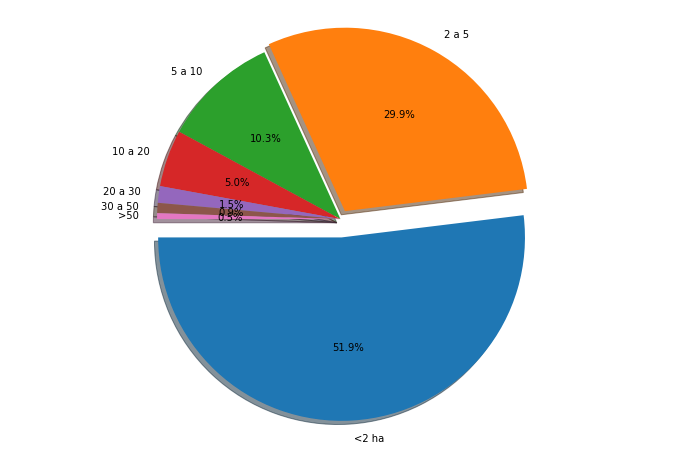

In [97]:
#def_18_19
frecuencia_19 = pd.cut(df2["def19"], bins=bins)
fr_19 = (df.groupby(frecuencia_19).agg(frequency=("def", "count")).reset_index())
fr_19["cum_frequency"] = fr_19["frequency"].cumsum()

porcentaje=100*fr_19['frequency']/fr_19['frequency'].sum()

labels = ['<2 ha','2 a 5','5 a 10','10 a 20','20 a 30', '30 a 50','>50']
explode = (0.1 , 0.05, 0, 0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(porcentaje, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, radius=1)
ax1.axis('equal') 
plt.show()

### 2.1. Variación en los tamaños 2017-2018 y 2018-2019

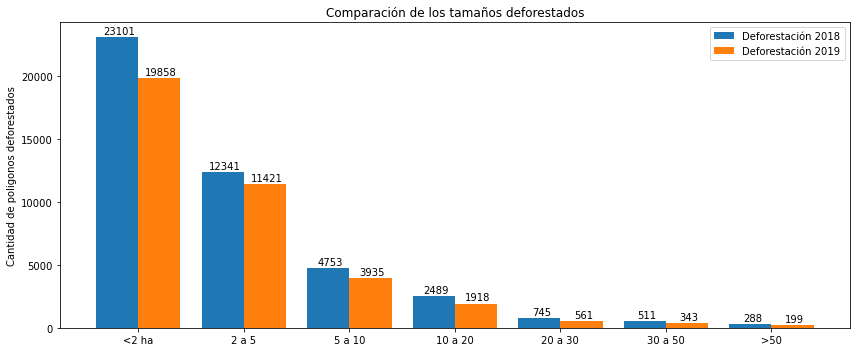

In [98]:
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12,5))
rects1 = ax.bar(x - width/2,  list(fr_18["frequency"]), width, label='Deforestación 2018')
rects2 = ax.bar(x + width/2,  list(fr_19["frequency"]), width, label='Deforestación 2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad de poligonos deforestados')
ax.set_title('Comparación de los tamaños deforestados')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(2, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

En el rango menor a dos hectáreas se presentó la mayor disminución (de 13 %) de polígonos deforestados.

## 3. Análisis de la región de la Amazonia para el año 2018 - 2019


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm
#import geopandas as gpd

data = 'E:/Trabajo/1_SMBYC/1_Deforestación/Tamaño_Deforestación/V2/Deforestación_total_def_14_19_anual_ident_py.csv'
df = pd.read_csv(data, sep=";")
#df.head(5)
df2=df.drop(['wkt_geom'], axis=1)
dfmask=df2['depto'] =='Putumayo'
df_amazonia_19=df2[dfmask]
#df_amazonia_19.describe()

### 3.1. Box plot Amazonia
>+ Conteo..: 17387
+ mean....: 5.65
+ std.....:	11.74
+ min.....:	0.007
+ 50%.....: 2.32
+ max.....: 470.36

El promedio del tamaño de la deforestación para la región de la amazonia es de 5.65 y el mayor área deforestada es de 470.36 Ha 

C:\Users\crist\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\crist\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\crist\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\crist\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


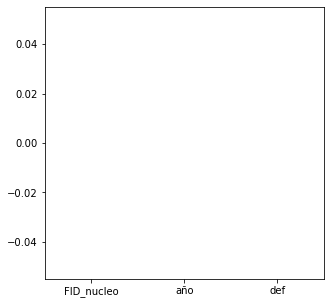

In [104]:
df_amazonia_19.plot.box(figsize=(5,5));

### 3.2. Distribución áreas deforestadas 2018-2019

In [105]:
bins = list([0, 1.999, 5, 10, 20, 30, 50, 5000 ])
names = list(['<2', '2-5', '5-10', '10-20', '20-30', '30-50', '>50'])
#def_10_12
frecuencia_19 = pd.cut(df_amazonia_19["def_19"], bins=bins)
fr_19 = (df_amazonia_19.groupby(frecuencia_19).agg(frequency=("def_19", "count")).reset_index())
fr_19["cum_frequency"] = fr_19["frequency"].cumsum()

fig, ax= plt.subplots(1,2,figsize=(15,5))
ax[0].hist(df_amazonia_19['def_19'],bins=50,range=(0.5,10),align='left')
ax[1].bar(names, list(fr_19["frequency"]))
_=ax[0].set_title('Deforestación Amazonia 2018-2019')
_=ax[1].set_title('Frecuencia 2018-2019')

KeyError: 'def_19'

### 3.4. Distribución porcentual del tamaño de la deforestación de la región de la amazonia  

* El 43.6% del área nacional deforestada para el año 2019 se concentra en un rango menor de 2 hectáreas. 
* Aproximadamente el 29.6% del área deforestada corresponde a deforestaciones de más de 2 a 5 hectáreas. 
* El 92% de la deforestación de Colombia se concentra en áreas menores de 10 hectáreas deforestadas. 

In [77]:
#def_18_19
frecuencia_19 = pd.cut(df_amazonia_19["def_19"], bins=bins)
fr_1819 = (df_amazonia_19.groupby(frecuencia_19).agg(frequency=("def_19", "count")).reset_index())
fr_1819["cum_frequency"] = fr_19["frequency"].cumsum()

porcentaje_19=100*fr_19['frequency']/fr_1819['frequency'].sum()

labels = ['<2 ha','2 a 5 ha','5 a 10 ha','10 a 20 ha','20 a 30 ha', '30 a 50 ha','> 50 ha']
explode = (0.1 , 0.05, 0, 0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(porcentaje_19, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, radius=1)
ax1.axis('equal') 
plt.show()

NameError: name 'df_amazonia_19' is not defined

## 4. Comparación de la variación de los tamaños de deforestación en la región de la Amazonia 

La región de la amazonia es una de las regiones en donde más se disminuyó la deforestación para el periodo del 2018-2019, con una reducción de 39.920 ha (28.89%), pasando de 138.176 Ha en el periodo 2017-2018 a 98.256 Ha (periodo 2018-2019).



In [19]:
#2018
data = 'E:/Trabajo/1_SMBYC/1_Deforestación/Tamaño_Deforestación/Cambio_2017-2018/def_2018_v8_190616_3116_regiones_python'
df = pd.read_csv(data, sep=";")
df2=df.drop(['id_reg'], axis=1)
dfmask=df2['Región'] =='Región de la Amazonia'
df_amazonia_18=df2[dfmask]
#df_amazonia_18.describe()

FileNotFoundError: [Errno 2] File b'E:/Trabajo/1_SMBYC/1_Deforestaci\xc3\xb3n/Tama\xc3\xb1o_Deforestaci\xc3\xb3n/Cambio_2017-2018/def_2018_v8_190616_3116_regiones_python' does not exist: b'E:/Trabajo/1_SMBYC/1_Deforestaci\xc3\xb3n/Tama\xc3\xb1o_Deforestaci\xc3\xb3n/Cambio_2017-2018/def_2018_v8_190616_3116_regiones_python'

In [20]:
#2019
data = 'E:/Trabajo/1_SMBYC/1_Deforestación/Tamaño_Deforestación/def_2019_v8_200707_3116_regiones_naturales_python'
df = pd.read_csv(data, sep=";")
df2=df.drop(['id_reg'], axis=1)
dfmask=df2['Región'] =='Región de la Amazonia'
df_amazonia_19=df2[dfmask]
#df_amazonia_19.describe()

### 4.1. Variación de acuerdo a los rangos establecidos

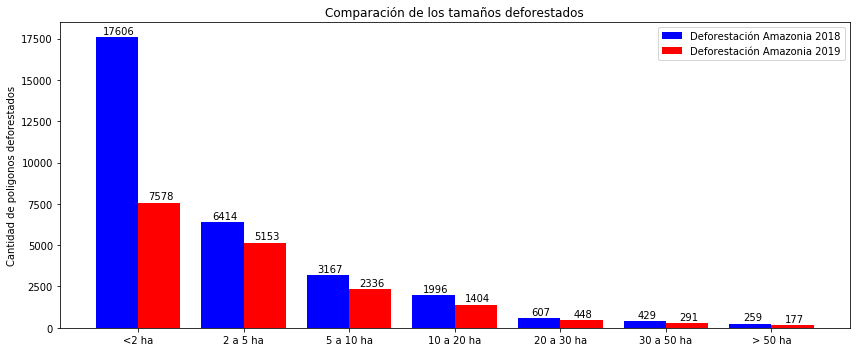

In [22]:
#def_17_18
frecuencia_18 = pd.cut(df_amazonia_18["def_18"], bins=bins)
fr_18 = (df_amazonia_18.groupby(frecuencia_18).agg(frequency=("def_18", "count")).reset_index())
fr_18["cum_frequency"] = fr_18["frequency"].cumsum()
#def_18_19
frecuencia_19 = pd.cut(df_amazonia_19["def_19"], bins=bins)
fr_1819 = (df_amazonia_19.groupby(frecuencia_19).agg(frequency=("def_19", "count")).reset_index())
fr_1819["cum_frequency"] = fr_19["frequency"].cumsum()
#%
porcentaje_18=100*fr_18['frequency']/fr_18['frequency'].sum()
porcentaje_19=100*fr_19['frequency']/fr_19['frequency'].sum()
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12,5))
rects1 = ax.bar(x - width/2,  list(fr_18["frequency"]), width, label='Deforestación Amazonia 2018', color='blue')
rects2 = ax.bar(x + width/2,  list(fr_19["frequency"]), width, label='Deforestación Amazonia 2019', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad de poligonos deforestados')
ax.set_title('Comparación de los tamaños deforestados')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(2, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

### 4.2. Comparación porcentual de la variación del tamaño de deforestación en los ultimos dos resportes 

Al realizar un análisis de la disminución de la deforestación para esta región, se encontró una disminución considerable respecto al número de polígonos menores de 2 Ha, pasando de 17.606 polígonos deforestados para el periodo 2017-2018 a 7.578 polígonos para el periodo 2018-2019, mostrando una reducción en este rango del 56.95%, disminuyendo 10.027 polígonos de deforestación. Una tendencia diferente a la tendencia nacional, que redujo 13.9% el número de polígonos menores de 2 Ha.

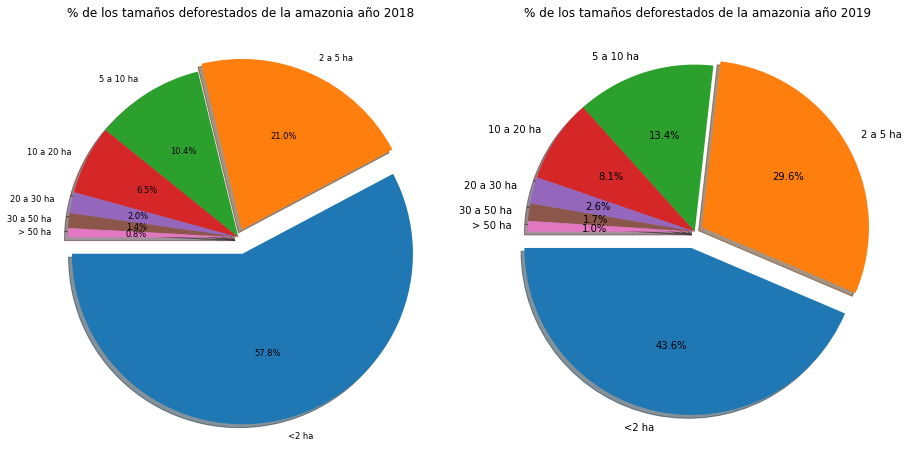

In [23]:
fig1, ax = plt.subplots(1,2,figsize=(15,8))
ax[0].pie(porcentaje_18, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, radius=1,textprops={'size': 'smaller'})
ax[0].axis('equal') 
ax[1].pie(porcentaje_19, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180, radius=1)
ax[1].axis('equal') 
ax[0].set(title="% de los tamaños deforestados de la amazonia año 2018")
ax[1].set(title="% de los tamaños deforestados de la amazonia año 2019")
plt.show()

## 5. Conclusiones 

#### Sobre la serie de tiempo Nacional:
*	El promedio de las áreas deforestadas presenta una tendencia positiva, en los 9 años de análisis ha aumentado el tamaño promedio de la deforestación en 1.23 hectáreas. Cabe resaltar que el área total deforestada ha disminuido los últimos dos años, aunque el tamaño de las áreas deforestadas haya aumentado. 
*	En el año 2019 presenta el tercer polígono de mayor hectárea deforestada en la serie del 2010 a 2019 con un área de 2.303 hectáreas.
*	La mediana de las áreas deforestadas presenta un incremento constante a lo largo de los años, el ultimo periodo presenta un valor máximo de mediana de toda la serie de tiempo con un valor de 1.95 hectáreas.

#### Sobre el cambio 2018-2019 Nacional:
*	El 52% del área nacional deforestada para el año 2019 se concentra en un rango menor de 2 hectáreas. 
*	Aproximadamente el 30% del área deforestada corresponde a deforestaciones de más de 2 a 5 hectáreas. 
*	El 81.8% de la deforestación de Colombia para el año 2019 se concentra en áreas menores de 5 hectáreas. 

#### Sobre Tamaños de deforestación Región de la Amazonia:
*	El 43.6% del área nacional deforestada para el año 2019 se concentra en un rango menor de 2 hectáreas. 
*	Aproximadamente el 29.6% del área deforestada corresponde a deforestaciones de más de 2 a 5 hectáreas. 
*	El 73.2% de la deforestación de la región de la amazonia se concentra en áreas menores de 5 hectáreas. 
*	La región de la amazonia es una de las regiones en donde más se disminuyó la deforestación para el periodo del 2018-2019, con una reducción de 39.920 ha (28.89%), pasando de 138.176 Ha en el periodo 2017-2018 a 98.256 Ha (periodo 2018-2019).
*	La región de la amazonia presenta una disminución considerable respecto al número de polígonos menores de 2 Ha, pasando de 17.606 polígonos deforestados para el periodo 2018 a 7.578 para el 2019.
*	El promedio del tamaño de la deforestación en la región de la amazonia aumento pasando de 4.53 Ha a 5.65 Ha.
*   177 poligonos fueron detectados con un área mayor a 50 Ha en la región de la Amazonia, con suma de área de 14.910 ha. Estos poligonos representan el 15% del área total deforestada de la región de la Amazonia.